# Titanic Survivors Project

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")


In [4]:
df = pd.read_csv('/Projects/Kaggle/TitanicSurvivors/train.csv')
print(df.columns)
print(df.shape)

#Imbalanced or not
print(df['Survived'].value_counts())

#Taking class lables out
cls = df["Survived"] 
#df = df.drop('Survived', axis = 1)
#print(df.columns)
print(df.shape)



Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
(891, 12)
0    549
1    342
Name: Survived, dtype: int64
(891, 12)


### Survival Analysis based over Pclass

<AxesSubplot:xlabel='Survived', ylabel='count'>

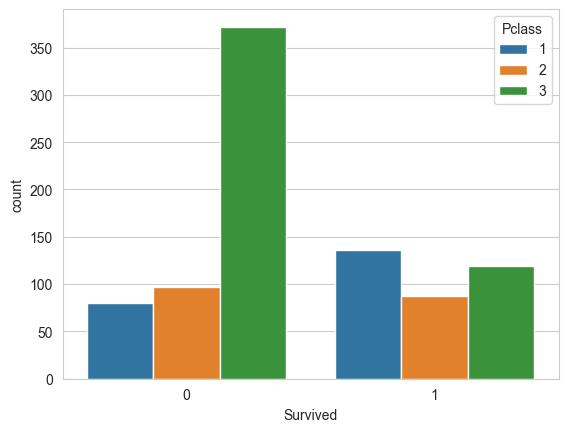

In [5]:
sns.set_style('whitegrid')
#sns.scatterplot(data = df, x = 'Survived', y='Pclass', hue='Sex')
sns.countplot(data = df, x = 'Survived', hue='Pclass' )

### Survival Analysis based over Sex - M/F

<AxesSubplot:xlabel='Survived', ylabel='count'>

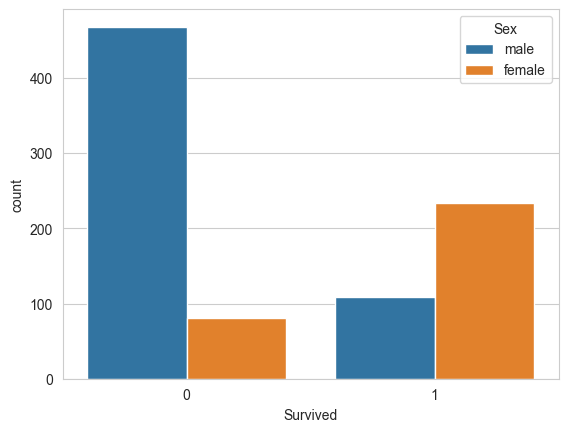

In [6]:
sns.set_style('whitegrid')
#sns.scatterplot(data = df, x = 'Survived', y='Pclass', hue='Sex')
sns.countplot(data = df, x = 'Survived', hue='Sex')

### PDF for Age feature

<AxesSubplot:xlabel='Age', ylabel='Count'>

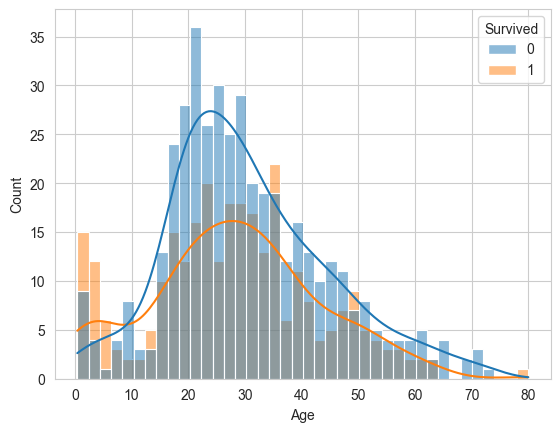

In [7]:
#sns.FacetGrid(df ,height=5).map(plt.scatter, "Pclass", "Age").add_legend()

sns.histplot(data = df, x='Age',hue = 'Survived',kde=True, bins=40)

### PDF for SibSP


array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

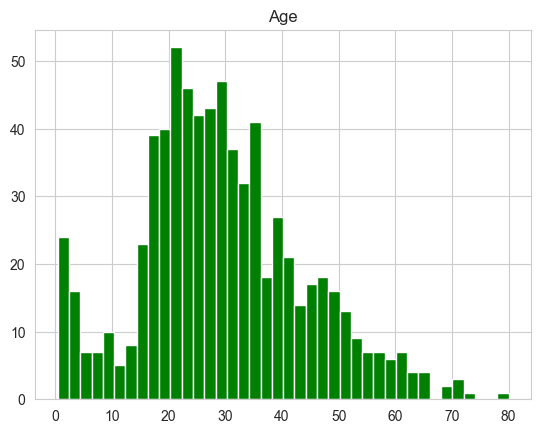

In [8]:
#sns.histplot(data=df, x = 'SibSp',kde=True,bins=10, hue='Survived')

df.hist(column='Age',bins=40,color = 'green')   ## Plotting usin inbuilt daaframe function

### Box - Plot to check for the Oulier

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

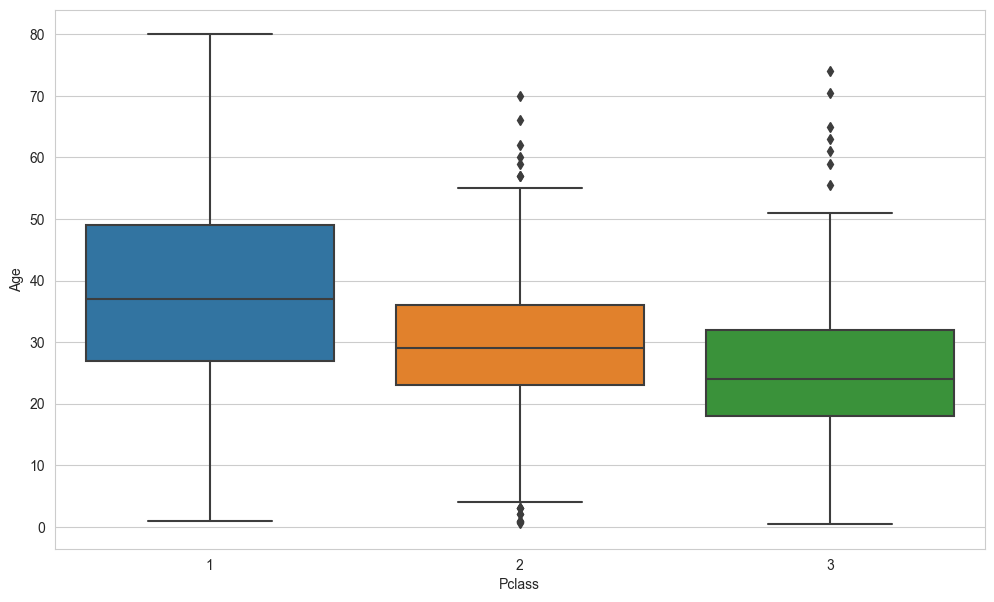

In [9]:
plt.figure(figsize=(12,7))
sns.boxplot(data=df, x = 'Pclass', y='Age')

### Checking for Null values using HeatMap

<AxesSubplot:>

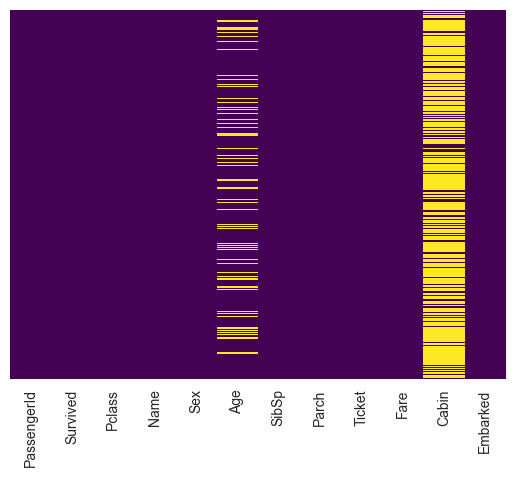

In [10]:
sns.heatmap(df.isnull(),yticklabels=False, xticklabels=True, cbar=False,cmap='viridis')   #cbar = True try

### Function to find Avg age with respect to passenger class

In [11]:
def countAge(data, cval) : 
    temp = df[df["Pclass"] == cval]
    print("Avg for class " + str(cval) + " is " + str(temp["Age"].dropna().mean()))
    
countAge(df,1)
countAge(df,2)
countAge(df,3)

#countAge(df,4)
    

Avg for class 1 is 38.233440860215055
Avg for class 2 is 29.87763005780347
Avg for class 3 is 25.14061971830986


### Function to impute Null values

In [12]:
def replace(col) : 
    pclass = col[0]
    age = col[1]
    
    if pd.isnull(age) :
        if pclass == 1 :
            return 38.23
        
        elif pclass == 2 :
            return 29.87
        
        else : 
            return 25.14
    else :
        return age
    

<AxesSubplot:>

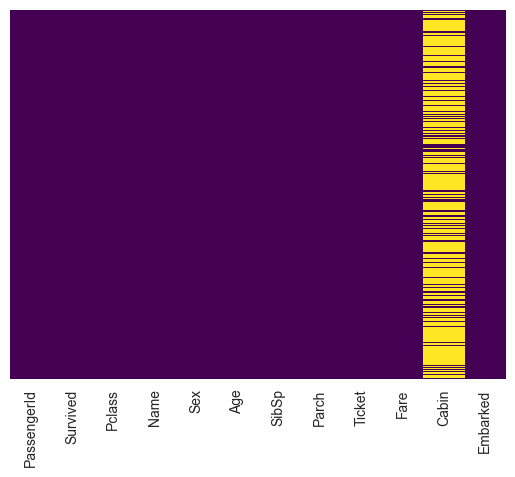

In [13]:
df["Age"] = df[["Pclass", "Age"]].apply(replace, axis=1)
sns.heatmap(df.isnull(), yticklabels=False,cbar=False, cmap="viridis")

### Handling Categorical Features like 'Sex' and 'Embarked'

In [14]:

embarked = pd.get_dummies(df['Embarked'], drop_first = True )
sex = pd.get_dummies(df['Sex'], drop_first=True)

df.head(5)

df.columns
df.drop(['Name','Cabin','Ticket','Sex','Embarked'], axis = 1, inplace=True)
df = pd.concat([df, embarked, sex],axis =1)



In [15]:
df.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,1,0,3,22.0,1,0,7.2500,0,1,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,1,0
3,4,1,1,35.0,1,0,53.1000,0,1,0
4,5,0,3,35.0,0,0,8.0500,0,1,1


### Train-Test Split

In [16]:
cls = df['Survived']
titanic = df.drop(['Survived'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(titanic, cls, test_size=0.1)


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(n_neighbors=12)
model.fit(X_train, y_train)

pred = model.predict(X_test)

acc = accuracy_score(pred, y_test, normalize=True)*float(100)
acc


64.44444444444444